## **<문제> 거스름돈: 문제 설명**
- 당신은 음식점의 계산을 도와주는 점원입니다. 카운터에는 거스름돈으로 사용할 500원, 100월, 50원, 10원짜리 동전이 무한히 존재한다고 가정한다. 손님에게 거슬러 주어야 할 돈이 N원일 때 거슬러 주어야 할 동전의 최소 개수를 구하세요. 단, 거슬러 줘야 할 돈 N은 항상 10의 배수이다.  

- 입력조건 : 첫째 줄에 N(1 <= N <= 100000)과 K(2 <= K <= 100000)가 공백을 기준으로 하여 각각 자연수로 주어진다.
- 첫째 줄에 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 횟수의 최솟값을 출력한다.  

**문제 해결 아이디어**
- 최적의 해를 빠르게 구하기 위해서는 가장 큰 화폐 단위부터 돈을 거슬러 주면 된다.
- N원을 거슬러 줘야 할 때, 가장 먼저 500원으로 거슬러 줄 수 있을 만큼 거슬러 준다.
- 이후에 100원, 50원, 10원짜리 동전을 차례대로 거슬러 줄 수 있을 만큼 거슬러 주면 된다.

In [1]:
n = 1260
count = 0

# 큰 단위의 화폐부터 차례대로 확인하기
array = [500, 100, 50, 10]

for coin in array:
    count += n//coin # 해당 화폐로 거슬러 줄 수 있는 동전의 개수 세기
    n %= coin
    
print(count)

6


## **<문제> 1이 될 때까지: 문제 설명**
- 어떠한 수 N이 1이 될 때까지 다음의 두 과정 중 하나를 반복적으로 선택하여 수행하려고 한다. 단, 두번째 연산은 N이 K로 나누어 떨어질 때만 선택할 수 있다.
- 1. N에서 1을 뺀다.
- 2. N을 K로 나눈다.
- 예를 들어 N이 17, K가 4라고 가정한다. 이때 1번의 과정을 한 번 수행하면 N은 16이 된다. 이후에 2번의 과정을 두 번 수행하면 N은 1이 된다. 결과적으로 이 경우 전체 과정을 실행한 횟수는 3이 된다. 이는 N을 1로 만드는 최소 횟수이다.
- N과 K가 주어질 때 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 최소 횟수를 구하는 프로그램을 작성하라.  

**문제 해결 아이디어**
- 주어진 N에 대하여 최대한 많이 나누기를 수행하면 된다.
- N의 값을 줄일 때 2 이상의 수로 나누는 작업이 1을 빼는 작업보다 수를 훨씬 많이 줄일 수 있다.

In [5]:
# N, K을 공백을 기준으로 구분하여 입력 받기
n, k = map(int, input().split())
result = 0

while True:
    # N이 K로 나누어 떨어지는 수가 될 때까지 빼기
    target = (n // k) * k
    result += (n - target)
    n = target
    # N이 K보다 작을 때 (더 이상 나눌 수 없을 때) 반복문 탈출
    if n < k :
        break
    # K로 나누기
    result += 1
    n //= k

# 마지막으로 남은 수에 대하여 1씩 빼기
result += (n -1)
print(result)

17 4
3


## **<문제> 곱하기 혹은 더하기: 문제 설명**
- 각 자리가 숫자(0부터 9)로만 이루어진 문자열 S가 주어졌을 때, 왼족부터 오른쪽으로 하나씩 모든 숫자를 확인하며 숫자 사이에 'X'혹은 '+' 연산자를 넣어 결과적으로 만들어질 수 있는 가장 큰 수를 구하는 프로그램을 작성하세요. 단, +보다 X를 먼저 계산하는 일반적인 방식과는 달리, 모든 연산은 왼쪽에서부터 순서대로 이루어진다고 가정한다.
- 예를 들어 02984라는 문자열로 만들 수 있는 가장 큰 수는 ((((0 + 2) X 9) X 4) = 576 이다. 또한 만들어질 수 있는 가장 큰 수는 항상 20억 이하의 정수가 되도록 입력이 주어진다.  

- 입력 조건 : 첫째 줄에 여러 개의 숫자로 구성된 하나의 문자열 S가 주어진다.(1 <= S의 길이 <= 20)  
- 출력 조건 : 첫째 줄에 만들어질 수 있는 가장 큰 수를 출력한다.

**문제 해결 아이디어**
- 대부분의 경우 '+'보다는 'X'가 더 값을 크게 만든다.
- 예를 들어 5 + 6 = 11이고 5 X 5 = 30이다.
- 다만 두 수 중에서 하나라도 '0' 혹은 '1'인 경우, 곱하기보다는 더하기를 수행하는 것이 효율적이다.
- 따라서 두 수에 대하여 연산을 수행할 때, 두 수 중에서 하나라도 1 이하인 경우에는 더하며, 두 수가 모두 2 이상인 경우에는 곱하면 정답이다.

In [6]:
data = input()

# 첫 번째 문자를 숫자로 변경하여 대입
result = int(data[0])

for i in range(1, len(data)):
    # 두 수 중에서 하나라도 '0' 혹은 '1'인 경우, 곱하기보다는 더하기 수행
    num = int(data[i])
    if num <= 1 or result <= 1:
        result += num
    else:
        result *= num
        
print(result)

02984
576


## **<문제> 모험가 길드: 문제 설명**
- 한 마을에 모험가가 N명 있다. 모험가 길드에서는 N명의 모험가를 대상으로 '공포도'를 측정했는데, '공포도'가 높은 모험가는 쉽게 공포를 느껴 위험 상황에서 제대로 대처할 능력이 떨어진다.
- 모험가 길드장인 동빈이는 모험가 그룹을 안전하게 구성하고자 공포도가 X인 모험가는 반드시 X명 이상으로 구성한 모험가 그룹에 참여해야 여행을 떠날 수 있도록 규정했다.
- 동빈이는 최대 몇 개의 모험가 그룹을 만들 수 있는지 궁금하다. N명의 모험가에 대한 정보가 주어졌을 때, 여행을 떠날 수 있는 그룹 수의 최댓값을 구하는 프로그램을 작성해라.  
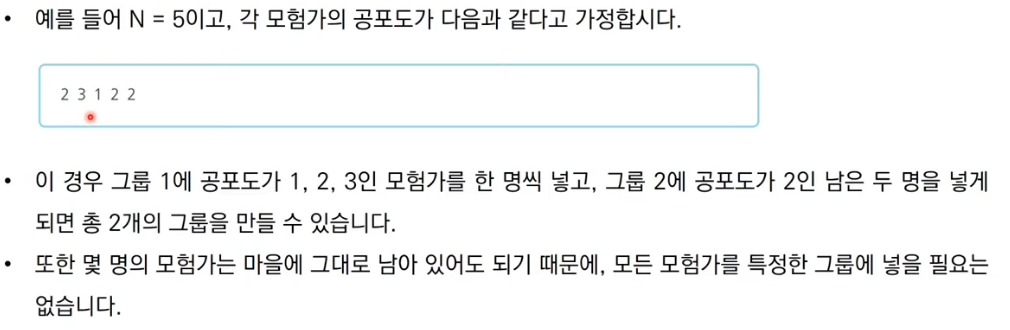
- 입력 조건 : 첫째 줄에 모험가의 수 N이 주어진다. 둘째 줄에 각 모험가의 공포도의 값을 N 이하의 자연수로 주어지며, 각 자연수는 공백으로 구분한다.
- 출력 조건 : 여행을 떠날 수 있는 그룹 수의 최댓값을 출력한다.
**<문제 해결 아이디어**
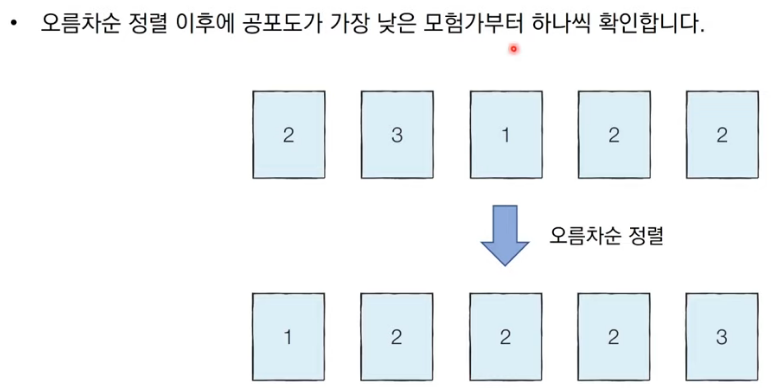
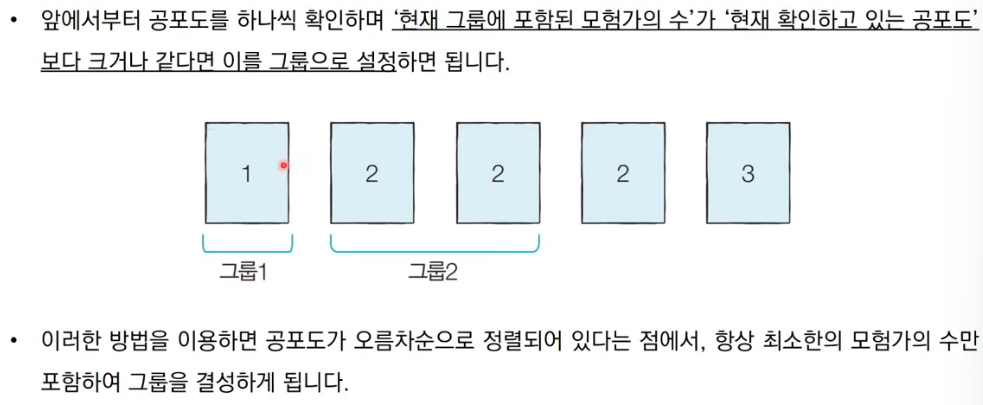

In [1]:
n = int(input())
data = list(map(int, input().split()))
data.sort()

result = 0 # 총 그룹의 수
count = 0 # 현재 그룹에 포함된 모함가의 수

for i in data: # 공포도를 낮은 것부터 하나씩 확인하며
    count += 1 # 현재 그룹에 해당 포함가를 포함시키기
    if count >= i: # 현재 그룹에 포함된 모함가의 수가 현재의 공포도 이상이라면, 그룹 결성
        result += 1 # 총 그룹의 수 증가시키기
        count = 0 # 현재 그룹에 포함된 모험가의 수 초기화

print(result) # 총 그룹의 수 출력
'''
5
2 3 1 2 2
'''

5
2 3 1 2 2
2


'\n5\n2 3 1 2 2\n'

## **<문제> 상하좌우: 문제 설명**
- 여행가 A는 N X N 크기의 정사각형 공간 위에 서 있다. 이 공간은 1 X 1 크기의 정사각형으로 나누어져 있다. 가장 왼쪽 위 좌표는 (1, 1)이며, 가장 오른쪽 아래 좌표는 (N, N)에 해당한다. 여행가 A는 상, 하, 좌, 우 방향으로 이동할 수 있으며, 시작 좌표는 항상 (1, 1)이다. 우리 앞에는 여행가 A가 이동할 계획이 적힌 계획서가 놓여 있다.
- 계획서에는 하나의 줄에 띄어쓰기를 기준으로 하여 L, R, U, D 중 하나의 문자가 반복적으로 적혀 있다. (L : 왼쪽으로 한 칸 이동, R : 오른쪽으로 한 칸 이동, U : 위로 한 칸 이동, D : 아래로 한 칸 이동)  
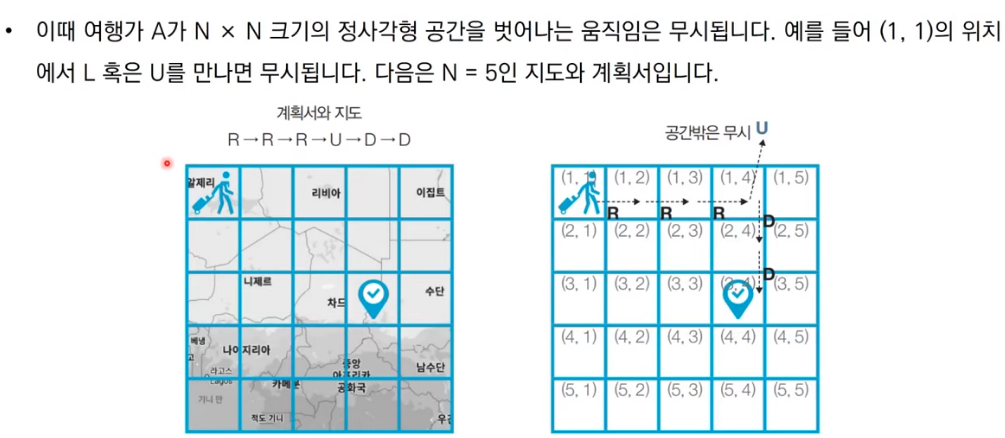
- 입력 조건 : 첫째 줄에 공간의 크기를 나타내는 N이 주어진다. 둘째 줄에 여행가 A가 이동할 계획서 내용이 주어진다.
- 출력 조건 : 첫째 줄에 여행가 A가 최종적으로 도착할 지점의 좌표 (X, Y)를 공백을 기준으로 구분하여 출력한다.  

**문제 해결 아이디어**
- 일련의 명령에 따라서 개체를 차례대로 이동시킨다는 점에서 시뮬레이션(simulation) 유형으로도 분류되며 구현이 중요한 대표적인 문제 유형이다.

In [4]:
# N 입력 받기
n = int(input())
x, y = 1, 1
plans = input().split()

# L, R, U, D에 따른 이동 방향
dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0]
move_types = ['L', 'R', 'U', 'D']

# 이동 계획을 하나씩 확인하기
for plan in plans:
    # 이동 후 좌표 구하기
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i]
            ny = y + dy[i]
    # 공간을 벗어나는 경우 무시
    if nx < 1 or ny < 1 or nx > n or ny > n:
        continue
    # 이동 수행
    x, y = nx, ny
    
print(x, y)
'''
5
R R R U D D
'''

5
R R R U D D
3 4


'\n5\nR R R U D D\n'

## **<문제> 시각: 문제 설명**
- 정수 N이 입력되면 00시 00분 00초부터 N시 59분 59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 구하는 프로그램을 작성하세요.
- 예를 들어 1을 입력했을 때 다음은 3이 하나라도 포함되어 있으므로 세어야 하는 시각이다. -> 00시 00분 03초 / 00시 13분 30초
- 반면에 다음은 3이 하나도 포함되어 있지 않으므로 세면 안 되는 시각이다. -> 00시 02분 55초 / 01시 27분 45초
- 입력 조건 : 첫째 줄에 정수 N이 입력된다.
- 출력 조건 : 00시 00분 00초부터 N시 59분 59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 출력한다.  

**문제 해결 아이디어**
- 이 문제는 가능한 모든 시각의 경우를 하나씩 모두 세서 풀 수 있는 문제이다.
- 하루는 86,400초이므로 00시 00분 00초부터 23시 59분 59초까지의 모든 경우는 86400가지이다.
- 따라서 단순히 시각을 1씩 증가시키면서 3이 하나라도 포함되어 있는지를 확인하면 된다.
- 이러한 유형은 완전 탐색 문제 유형이라고 불린다. 

In [2]:
# H 입력 받기
h = int(input())

count = 0
for i in range(h+1):
    for j in range(60):
        for k in range(60):
            # 매 시각 안에 '3'이 포함되어 있다면 카운트 증가
            if '3' in str(i) + str(j) + str(k):
                count += 1

print(count)

5
11475


## **<문제> 왕실의 나이트: 문제 설명**
- 행복 왕국의 왕실 정원은 체스판과 같은 8 X 8 좌표 평면이다. 왕실 정원의 특정한 한 칸에 나이트가 서있다. 나이트는 매우 충성스러운 신하로서 매일 무술을 연마한다.
- 나이트는 말을 타고 있기 때문에 이동을 할 때는 L자 형태로만 이동할 수 있으며 정원 밖으로는 나갈 수 없다.
- 나이트는 특정 위치에서 다음과 같은 2가지 경우로 이동할 수 있다.
1. 수평으로 두 칸 이동한 뒤에 수직으로 한 칸 이동하기
2. 수직으로 두 칸 이동한 뒤에 수평으로 한 칸 이동하기
- 이처럼 8 X 8 좌표 평면상에서 나이트의 위치가 주어졌을 때 나이트가 이동할 수 있는 경우의 수를 출력하는 프로그램을 작성하라.
- 왕실의 정원에서 행 위치를 표현할 때는 1부터 8로 표현하며, 열 위치를 표현할 때는 a부터 h로 표현한다.
- c2에 있을 때 이동할 수 있는 경우의 수는 6가지이다.
- 입력 조건 : 첫째 줄에 8 X 8 좌표 평면상에서 현재 나이트가 위치한 곳의 좌표를 나타내는 두 문자로 구성된 문자열이 입력된다. 입력 문자는 a1처럼 열과 행으로 이뤄진다.
- 출력 조건 : 첫째 줄에 나이트가 이동할 수 있는 경우의 수를 출력한다.

**문제 해결 아이디어**
- 요구사항대로 충실히 구현하면 되는 문제이다.
- 나이트의 8가지 경로를 하나씩 확인하며 각 위치로 이동이 가능한지 확인한다.
- 리스트를 이용하여 8가지 방향에 대한 방향 벡터를 정의한다.


In [6]:
# 현재 나이트의 위치 입력받기
input_data = input()
row = int(input_data[1])
column = int(ord(input_data[0])) - int(ord('a')) + 1

# 나이트가 이동할 수 있는 8가지 방향 정의
steps = [(-2, -1), (-1, -2), (1, -2), (2, -1), (2, 1), (1, 2), (-1, 2), (-2, 1)]

# 8가지 방향에 대하여 각 위치로 이동이 가능한지 확인
result = 0
for step in steps:
    # 이동하고자 하는 위치 확인
    next_row = row + step[0]
    next_column = column + step[1]
    # 해당 위치로 이동이 가능하다면 카운트 증가
    if next_row >= 1 and next_row <= 8 and next_column >= 1 and next_column <= 8:
        result += 1
    
print(result)

a1
2


## **<문제> 문자열 재정렬: 문제 설명**
- 알파벳 대문자와 숫자(0~9)로만 구성된 문자열이 입력으로 주어진다. 이때 모든 알파벳을 오름차순으로 정렬하여 이어서 출력한 뒤에, 그 뒤에 모든 숫자를 더한 값을 이어서 출력한다.
- 예를 들어 K1KA5CB7이라는 값이 들어오면 ABCKK13을 출력한다.
- 입력 조건 : 첫째 줄에 하나의 문자열 S가 주어진다.
- 출력 조건 : 첫째 줄에 문제에서 요구하는 정답을 출력한다.
**문제 해결 아이디어**
- 요구사항대로 충실히 구현하면 되는 문제이다.
- 문자열이 입력되었을 때 문자를 하나씩 확인한다.
- 숫자인 경우 따로 합계를 계산한다.
- 알파벳의 경우 별도의 리스트에 저장한다.
- 결과적으로 리스트에 저장된 알파벳을 정렬해 출력하고, 합계를 뒤에 붙여 출력하면 정답이다.

In [11]:
data = input()
result = []
value = 0

# 문자를 하나씩 확인하며
for x in data:
    # 알파벳인 경우 결과 리스트에 삽입
    if x.isalpha():
        result.append(x)
    # 숫자는 따로 더하기
    else:
        value += int(x)

# 알파벳을 오름차순으로 정렬
result.sort()

# 숫자가 하나라도 존재하는 경우 가장 뒤에 삽입
if value != 0:
    result.append(str(value))

# 최종 결과 출력(리스트를 문자열로 변환하여 출력)
print(''.join(result))
'''
K1KA5CB7 -> ABCKK13
AJKDLSI412K4JSJ9D -> ADDIJJJKKLSS20
'''

K1KA5CB7
ABCKK13


'\nK1KA5CB7 -> ABCKK13\nAJKDLSI412K4JSJ9D -> ADDIJJJKKLSS20\n'

## **<문제> 떡볶이 떡 만들기: 문제 설명**
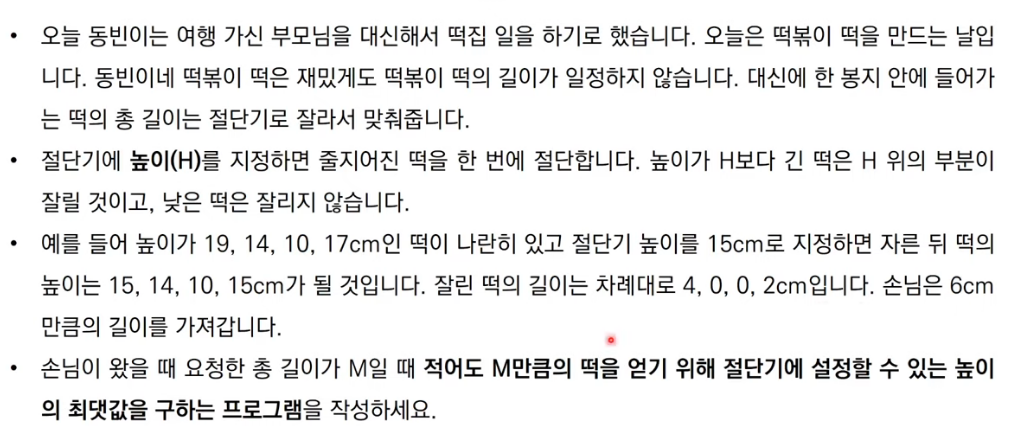
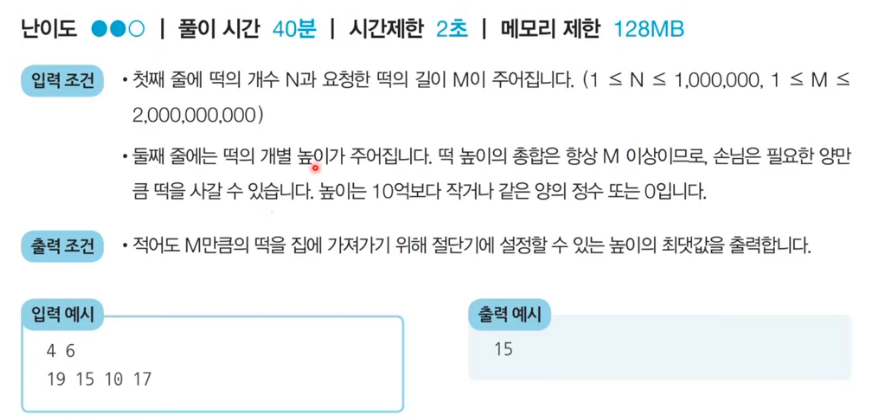  
**문제 해결 아이디어**
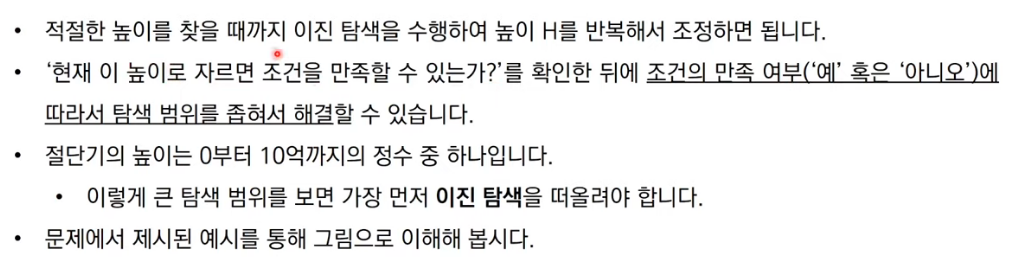

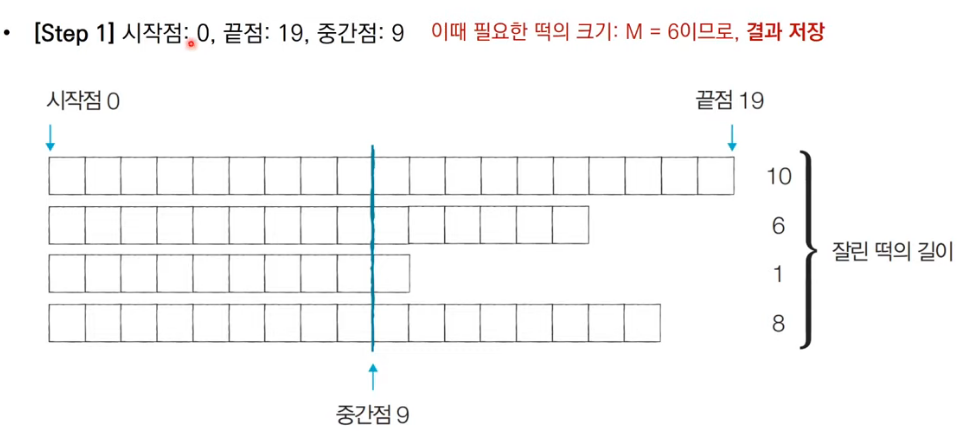
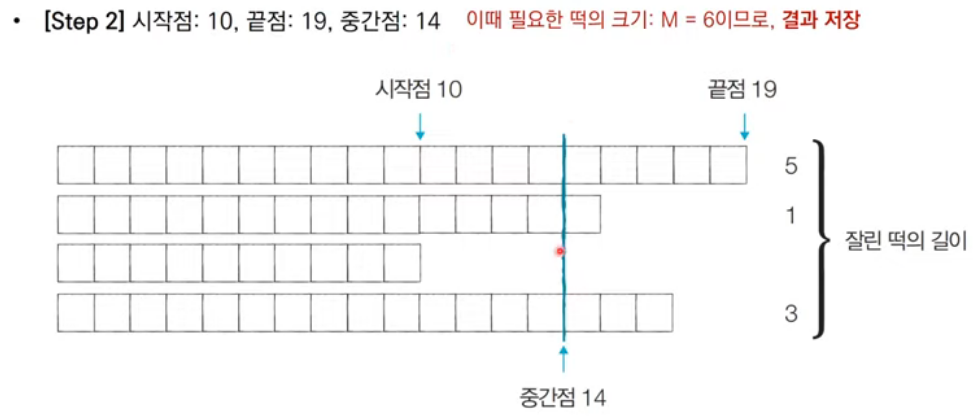
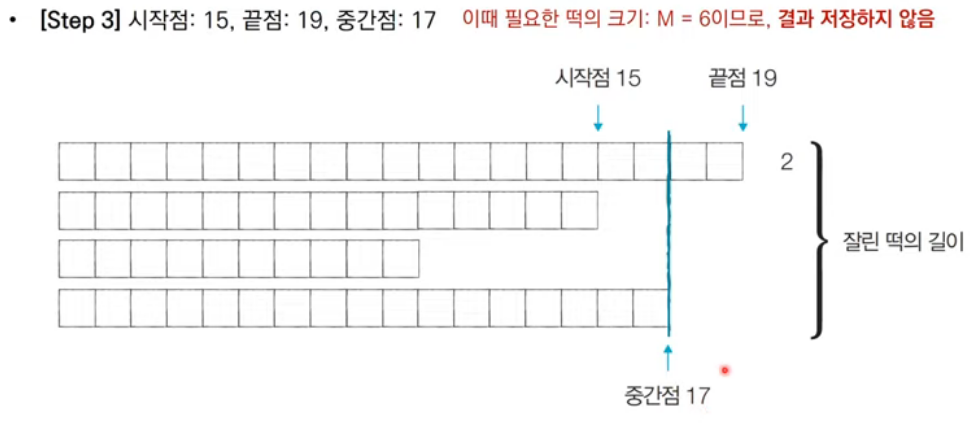
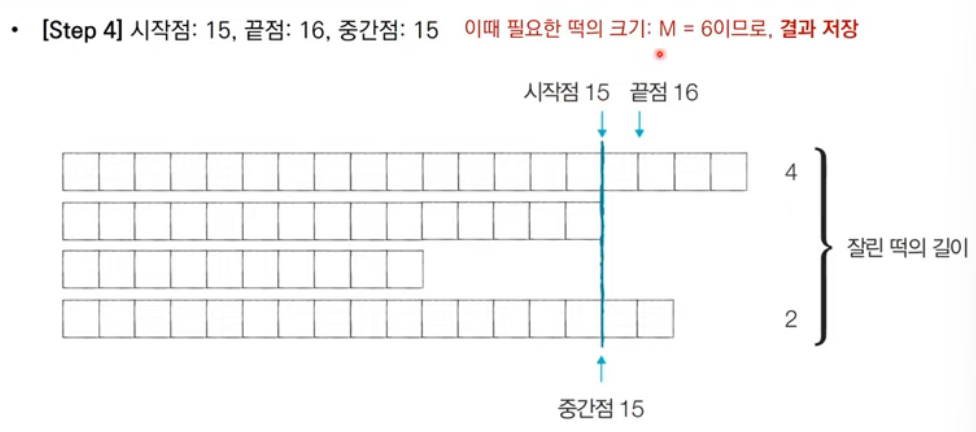
- 이러한 이진 탐색 과정을 반복하면 답을 도출할 수 있다.
- 중간점의 값은 시간이 지날수록 '최적화된 값'이 되기 때문에, 과정을 반복하면서 얻을 수 있는 떡의 길이 합이 필요한 떡의 길이보다 크거나 같을 대마 중간점의 값을 기록하면 된다.

In [15]:
# 떡의 개수(N)와 요청한 떡의 길이(M)을 입력
n, m = list(map(int, input().split(' ')))
# 각 떡의 개별 높이 정보를 입력
array = list(map(int, input().split()))

# 이진 탐색을 위한 시작점과 끝점 설정
start = 0
end = max(array)

# 이진 탐색 수행(반복적)
result = 0
while(start <= end):
    total = 0
    mid = (start + end) // 2
    for x in array:
        # 잘랐을 때의 떡의 양 계산
        if x > mid:
            total += x - mid
    # 떡의 양이 부족한 경우 더 많이 자르기(왼쪽 부분 탐색)
    if total < m:
        end = mid - 1
    # 떡의 양이 충분한 경우 덜 자르기 (오른쪽 부분 탐색)
    else:
        result = mid # 최대한 덜 잘랐을 때가 정답으므로, 여기에서 result에 기록
        start = mid + 1
        
# 정답 출력
print(result)

4 6
19 15 10 17
15


## **<문제> 정렬된 배열에서 특정 수의 개수 구하기: 문제 설명**
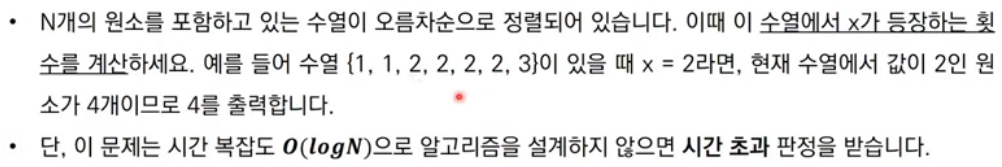
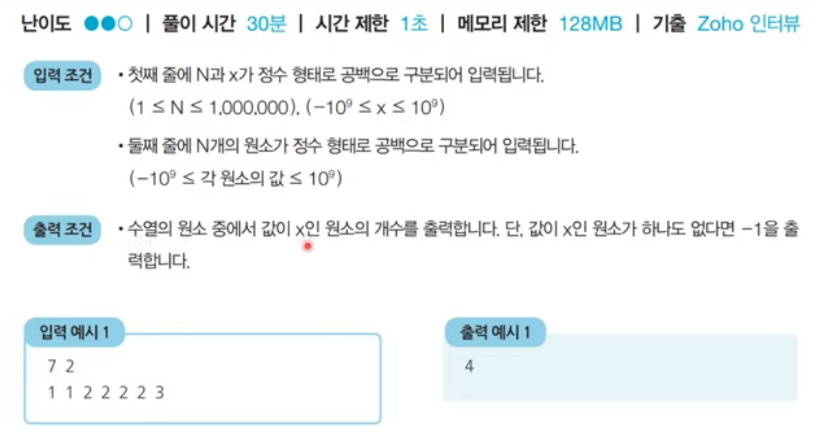
**문제 해결 아이디어**
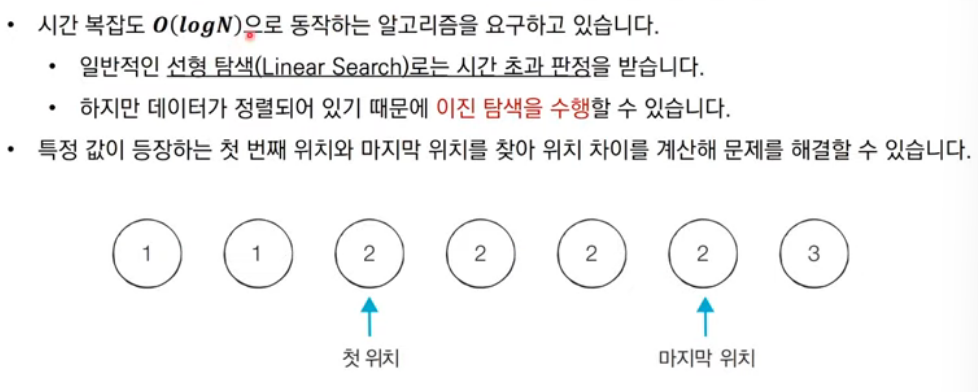

In [16]:
from bisect import bisect_left, bisect_right

In [19]:
# 값이 [left_value, right_value]인 데이터의 개수를 반환하는 함수
def count_by_range(array, left_value, right_value):
    right_index = bisect_right(array, right_value)
    left_index = bisect_left(array, left_value)
    return right_index - left_index

# 데이터의 개수 N, 찾고자 하는 값 x 입력받기
n, x = map(int, input().split())
# 전체 데이터 입력받기
array = list(map(int, input().split()))

# 값이 [x, x] 범위에 있는 데이터의 개수 계산
count = count_by_range(array, x, x)

# 값이 x인 원소가 존재하지 않는다면
if count == 0:
    print(-1)
# 값이 x인 원소가 존재한다면
else:
    print(count)

7 2
1 1 2 2 2 2 3
4
